In [1]:
# Prediction using Supervised ML

# Loading Libraries and Data

In [2]:
# Importing libraries and packages

import pandas as pd              # for data handling
import numpy as np               # for mathematical operations
import matplotlib.pyplot as plt  # for plotting graphs
%matplotlib inline
import seaborn as sns            # for visualization
from scipy import stats          # for statistics

In [3]:
# Reading data from remote URL link

df = pd.read_csv("http://bit.ly/w-data")    # fetching data from URL to dataframe
df                                          # prints data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploring the Data

In [ ]:
# Shape of dataframe

df.shape

(25, 2)

In [ ]:
# Columns

df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
# Datatypes of columns

df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
# information of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Statistics of Dataframe

df.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


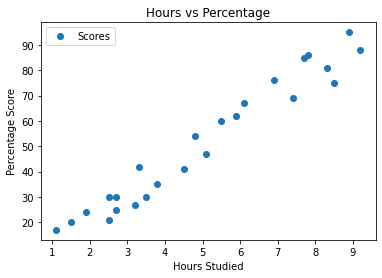

In [ ]:
# Plotting graph

df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Method 1 : Seaborn Regression Plot

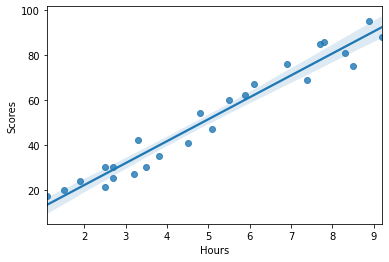

In [ ]:
# Regression Plot

sns.regplot(x=df['Hours'], y=df['Scores'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

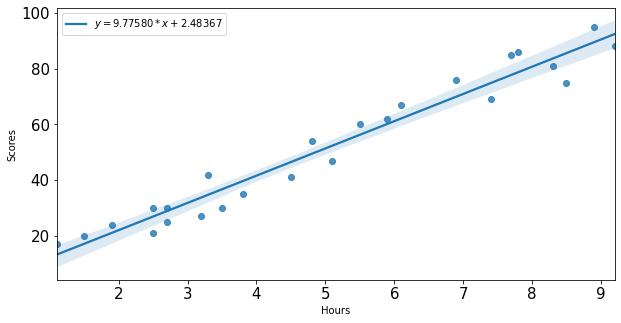

In [ ]:
# Coefficients of Regression line

fig, ax = plt.subplots(figsize=(10,5))
slope, intercept, r_value, pv, se = stats.linregress(df['Hours'], df['Scores'])
sns.regplot(df['Hours'], df['Scores'], line_kws={'label':'$y=%3.7s*x+%3.7s$'%(slope, intercept)})
plt.xticks(fontsize=15)
plt.legend()
plt.yticks(fontsize=15)

In [ ]:
# Slope and intercept

print(slope, intercept)
print(r_value)

9.775803390787473 2.4836734053731817
0.9761906560220887


y = 9.77x + 2.48 is the required equation


# Method 2 : Sklearn Linear Regression

In [4]:
# Separating dataset into Feature and Target variable

X = df.iloc[:, :-1].values   # Feature vector
y = df.iloc[:, 1].values     # Target vector

In [5]:
# shape of vectors

print(X.shape)
print(y.shape)

(25, 1)
(25,)


In [6]:
# Splitting dataset into 80% train set and 20% test set 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(20, 1)
(5, 1)


In [7]:
# Applying regression model

from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

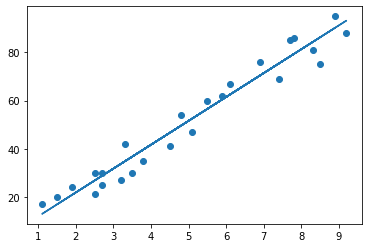

In [8]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [9]:
# Model prediction

print(X_test)                      
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


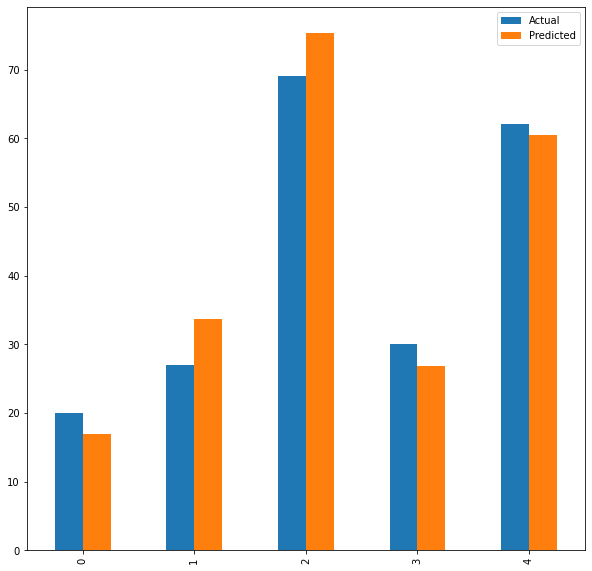

In [27]:
# Visualizing the comparison of actual vs predicted

df2.plot(kind = 'bar', figsize = (10,10))
plt.show()

In [20]:
# Error calculation

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [21]:
# coefficient and intercept of model

print('\nCoefficient of model :', regressor.coef_)
print('\nIntercept of model', regressor.intercept_)


Coefficient of model : [9.91065648]

Intercept of model 2.018160041434662


In [22]:
# prediction function

def predict_score(hours):
  return (9.91065648*hours + 2.018160041434662)

In [23]:
# Using above function we can now calculate score from hours

predict_score(9.25)

93.69173248143466